In [1]:
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Importing Dataset

In [3]:
from pathlib import Path
data_path = Path("data/")
image_path = Path(data_path / "Rock-Paper-Scissors")

In [4]:
import os
from zipfile import ZipFile

if "Rock-Paper-Scissors" not in os.listdir(data_path):
    with ZipFile(data_path / "archive.zip", "r") as zipfile:
        zipfile.extractall(data_path)
else:
    print(os.listdir(data_path))
    print("File is already present")

In [5]:
train_dir = image_path / "train"
test_dir = image_path / "test"

## Adding Custom Transformations

In [6]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize((224, 224)),
    
    transforms.ToTensor(),
    
    transforms.ColorJitter(contrast=2.0),
    transforms.GaussianBlur(5, sigma=(0.1, 2.0)),
    
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    transforms.Grayscale(num_output_channels=3)
])

In [7]:
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

In [8]:
batch_size=32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## Loading ResNet18 Model 
###### Note: Avoid this and jump to "Loading Model" if you do not want to train the model!

In [9]:
resnet18 = models.resnet18(weights='IMAGENET1K_V1')

In [10]:
num_classes = 3
in_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(in_features, num_classes)

In [11]:
resnet18.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Training Model

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.parameters(), lr=0.001)

In [13]:
from tqdm.auto import tqdm
num_epochs = 10
for epoch in range(num_epochs):
    print("Epoch: {epoch}".format(epoch=epoch+1))
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet18(inputs)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

Epoch: 1


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 2


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 3


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 4


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 5


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 6


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 7


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 8


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 9


  0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 10


  0%|          | 0/79 [00:00<?, ?it/s]

## Saving Model

In [14]:
PATH = "resnet-trained-model.pt"

In [15]:
torch.save(resnet18, PATH)

## Loading Model

In [16]:
resnet18 = torch.load(PATH)
resnet18.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Evaluating Model

In [17]:
resnet18.eval()

embeddings, labels = [], []

with torch.no_grad():
    correct = 0
    total = 0
    for images, batch_labels in test_loader:
        images = images.to(device)
        batch_labels = batch_labels.to(device)
        outputs = resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

        embeddings.extend(outputs.cpu().numpy())
        labels.extend(batch_labels.cpu().numpy())


In [18]:
total, correct

(372, 325)

In [19]:
print("Model achieved an accuracy of: {:.2f}%".format((correct / total) * 100))

Model achieved an accuracy of: 87.37%


## Plotting t-SNE Plot

In [20]:
embeddings[:5]

[array([ 0.9000944 , -0.5213823 , -0.35277632], dtype=float32),
 array([-0.40738583,  0.46275735, -0.16607156], dtype=float32),
 array([ 1.952458  , -2.2047114 ,  0.32865945], dtype=float32),
 array([-0.06905337, -1.4307182 ,  1.3100967 ], dtype=float32),
 array([ 1.7018931 , -1.9476765 ,  0.23121443], dtype=float32)]

In [21]:
labels[:5]

[0, 0, 0, 0, 0]

In [22]:
n_classes = test_dataset.classes
n_classes

['paper', 'rock', 'scissors']

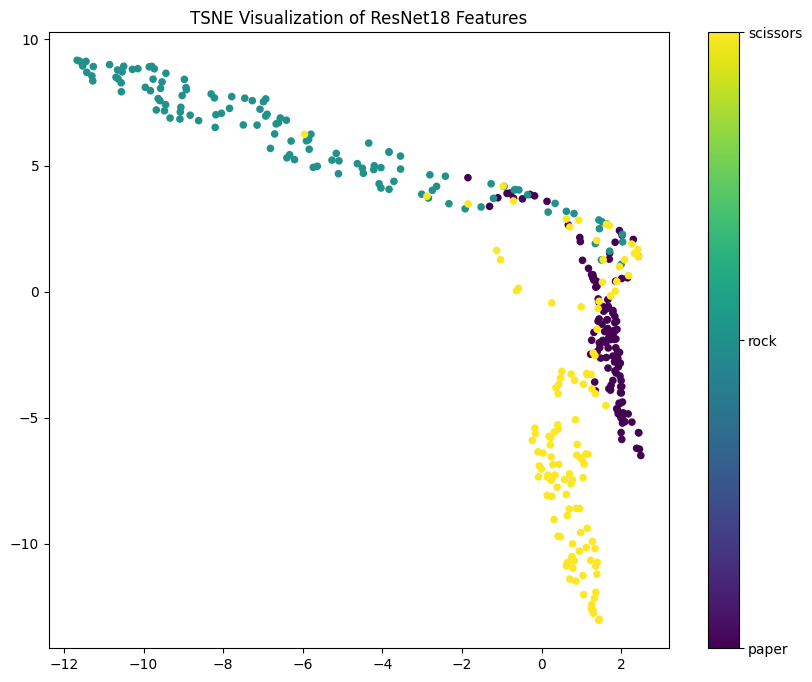

In [23]:
import numpy as np
from matplotlib import colormaps
from sklearn.manifold import TSNE

tsne_result = TSNE(n_components=3, learning_rate="auto", init='random', n_iter=10000, perplexity=30).fit_transform(np.array(embeddings))

cmap = colormaps.get_cmap('viridis')

plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap=cmap, s=20)

plt.title('TSNE Visualization of ResNet18 Features')
cbar = plt.colorbar()
cbar.set_ticks(np.arange(0, 3))
cbar.set_ticklabels(n_classes)

plt.show()

## Defining Grad-Cam

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[ 3.1085, -3.4365,  0.4660]], device='cuda:0')
paper


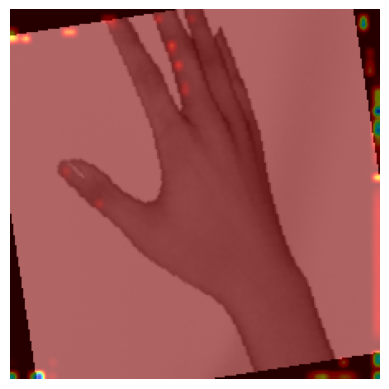

In [24]:
import cv2


def get_grad_cam(image, model, target_layer):
    model.eval()

    def forward_hook(module, input, output):
        feature_map = input[0]
        grad_value = output[0]

        grad_cam_features.append(feature_map)
        grad_cam_grads.append(grad_value)

    grad_cam_features = []
    grad_cam_grads = []

    hook_handle = target_layer.register_forward_hook(forward_hook)

    # Forward pass
    image = image.to(device)
    output = model(image.unsqueeze(0))
    predicted_class = torch.argmax(output)

    # Backward pass
    model.zero_grad()
    output[0, predicted_class].backward()

    hook_handle.remove()

    alpha_kc = torch.mean(grad_cam_grads[0].squeeze(), dim=[1, 2], keepdim=True)
    grad_cam = torch.mean((alpha_kc * grad_cam_features[0]), dim=1).squeeze()
    grad_cam = nn.ReLU()(grad_cam)

    grad_cam = grad_cam.detach().cpu().numpy()
    grad_cam = (grad_cam - np.min(grad_cam)) / (np.max(grad_cam) - np.min(grad_cam))

    return grad_cam


def overlay_grad_cam(image, grad_cam):
    heatmap = cv2.resize(grad_cam, (image.shape[2], image.shape[1]))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 200

    overlaid_img = heatmap + np.float32(image.permute(1, 2, 0))
    overlaid_img = overlaid_img / np.max(overlaid_img)

    return overlaid_img


def plot_grad_cam_heatmap(grad_cam, overlaid_img):
    plt.imshow(overlaid_img)
    plt.axis('off')
    plt.show()


target_layer = resnet18.layer1[-1].conv2

sample_image, _ = test_dataset[1]
sample_image = sample_image.to(device)
outputs = resnet18(sample_image.unsqueeze(0))
_, predicted = torch.max(outputs.data, 1)
print(outputs.data)
print(n_classes[predicted])

grad_cam = get_grad_cam(sample_image, resnet18, target_layer)
overlaid_img = overlay_grad_cam(sample_image.cpu(), grad_cam)
plot_grad_cam_heatmap(grad_cam, overlaid_img)

## Real-time Grad-Cam Detection 

In [25]:
import cv2
import numpy as np
from IPython.display import clear_output
   
cap= cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    clear_output(wait=True)
    
    ret,frame = cap.read()        
    
    sample_image = transforms.ToTensor()(frame).to(device)

    outputs = resnet18(sample_image.unsqueeze(0))
    _, predicted = torch.max(outputs.data, 1)
    
    grad_cam = get_grad_cam(sample_image, resnet18, target_layer)
    overlaid_img = overlay_grad_cam(sample_image.cpu(), grad_cam)
    
    print(outputs.data)
    print(n_classes[predicted])

    cv2.putText(overlaid_img, n_classes[predicted], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    cv2.imshow("image", overlaid_img)

    if cv2.waitKey(2) & 0xff == ord('q'):
         break
        
cap.release()
cv2.destroyAllWindows()

tensor([[-0.5571, -0.1064,  0.4554]], device='cuda:0')
scissors
